# Capstone Project - Analysis on Milan's Neighborhoods

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Milan is Italy’s city of the future, a fast-paced metropolis where money talks, creativity is big business and looking good is an art form. Internationally recognised as one of the world’s most important fashion capitals, but it also has a wealth of interesting museums and things to see and do

The objective of this project is to analyze and select the best locations in the city of Milan, what are the most prominent restaurants for potential stakeholders

## Data <a name="data"></a>

to perform this analysis, we will need the following data:
* List of the neighborhoods in Milan
* Geo-coordinates of the neighbordhoods in Milan
* Top venues by neighborhoods

List of the neighbordhoods, populatio nwill be obtained from **Milan data portal** where all sort of demographic and territorial information about the city are stored.
Venues data will be obtained from **Foursquare through an API**.  
Geo-coordinates of districts will be obtained with the help of the **geocoder tool in the notebook**.



Importing the necessary libraries

In [1]:
#import packages
import numpy as np 
import pandas as pd
import json 
!pip install requests
import requests 
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import lxml
import csv

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

import folium 

Let's start by getting the data of the neighborhood's in Milano and clean the data.

In [2]:
#get data from url

milano = pd.read_csv('https://dati.comune.milano.it/dataset/e8e765fc-d882-40b8-95d8-16ff3d39eb7c/resource/3fce7202-0076-4a7b-ac2c-d2ab9b5dc658/download/ds964_nil_wm_4326.csv', sep = ';')
milano

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Length,Shape_Area,OBJECTID,LONG_X_4326_CENTROID,LAT_Y_4326_CENTROID,Location
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,9.137260,45.438460,"(45.43846008524454, 9.137259756389806)"
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,9.101675,45.492822,"(45.49282208206156, 9.101674754135612)"
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,9.153947,45.484490,"(45.48449040970885, 9.15394716028658)"
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,9.156731,45.517433,"(45.51743260578181, 9.156730615341903)"
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,9.184235,45.523514,"(45.52351366911545, 9.184235146223243)"
5,63,FIGINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5622.522341,1.424660e+06,94,9.074376,45.491381,"(45.49138092971466, 9.07437556336504)"
6,20,LORETO - CASORETTO - NOLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5631.442413,1.747499e+06,95,9.222230,45.490944,"(45.49094380273962, 9.222229980723148)"
7,76,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96,9.137731,45.513636,"(45.51363591262143, 9.137730995274502)"
8,11,ISOLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5082.707418,1.322887e+06,97,9.189617,45.490894,"(45.490894189726816, 9.189616816977022)"
9,61,QUARTO CAGNINO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4648.169991,9.863542e+05,98,9.108096,45.473740,"(45.473739882611305, 9.108096395182534)"


In [3]:
milano.rename(columns={'LONG_X_4326_CENTROID': 'Longitude', 'LAT_Y_4326_CENTROID': 'Latitude'}, inplace=True)
milano.drop(columns={'Valido_dal', 'Valido_al','Fonte'}, inplace=True)
milano.drop(columns={'ID_NIL', 'Shape_Length', 'Shape_Area','OBJECTID', 'Location'}, inplace=True)
milano

,NIL,Longitude,Latitude
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,9.137260,45.438460
1,TRENNO,9.101675,45.492822
2,PORTELLO,9.153947,45.484490
3,BOVISASCA,9.156731,45.517433
4,PARCO NORD,9.184235,45.523514
5,FIGINO,9.074376,45.491381
6,LORETO - CASORETTO - NOLO,9.222230,45.490944
7,QUARTO OGGIARO - VIALBA - MUSOCCO,9.137731,45.513636
8,ISOLA,9.189617,45.490894
9,QUARTO CAGNINO,9.108096,45.473740


In [4]:
a = milano['NIL'].unique()
a

array(['RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO', 'TRENNO',
       'PORTELLO', 'BOVISASCA', 'PARCO NORD', 'FIGINO',
       'LORETO - CASORETTO - NOLO', 'QUARTO OGGIARO - VIALBA - MUSOCCO',
       'ISOLA', 'QUARTO CAGNINO', 'STADIO - IPPODROMI', 'QUINTO ROMANO',
       'DUOMO', 'GUASTALLA', 'SAN SIRO', 'COMASINA', 'TIBALDI',
       'GRECO - SEGNANO', 'DE ANGELI - MONTE ROSA', 'FARINI', 'BRUZZANO',
       'QT 8', 'STEPHENSON', 'CANTALUPA', 'QUINTOSOLE', 'PARCO SEMPIONE',
       'BARONA', 'VILLAPIZZONE - CAGNOLA - BOLDINASCO',
       "PARCO BOSCO IN CITTA'", 'GORLA - PRECOTTO',
       "NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI",
       'TRIULZO SUPERIORE', 'PTA ROMANA',
       'TALIEDO - MORSENCHIO - Q.RE FORLANINI',
       'PORTA TICINESE - CONCA DEL NAVIGLIO', 'TRE TORRI', 'ASSIANO',
       'MORIVIONE', 'VIGENTINO - Q.RE FATIMA', 'BICOCCA', 'ORTOMERCATO',
       'LODI - CORVETTO', 'MUGGIANO', 'PORTA TICINESE - CONCHETTA',
       'UMBRIA - MOLISE - CALVAIRATE', '

In [6]:
milano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NIL        88 non-null     object 
 1   Longitude  88 non-null     float64
 2   Latitude   88 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.2+ KB


In [8]:
# Identify coordinates of Milano, define and name user_agent as "Milano_explorer"
place = 'Milano'
geolocator = Nominatim(user_agent="Milano_explorer")
location = geolocator.geocode(place)
milano_lat = location.latitude
milano_lon = location.longitude
print(f"Coordinates of {place} are {milano_lat}, {milano_lon}")

Coordinates of Milano are 45.4641943, 9.1896346


Let's visualize the data we have so far: city location and candidate neighborhood centers:

In [9]:
map_milano = folium.Map(location = [milano_lat, milano_lon], zoom_start = 12)

# Add markers
for lat, lng, label in zip(milano['Latitude'], milano['Longitude'], milano['NIL']):
    folium.RegularPolygonMarker([lat, lng],
                                popup=label,
                                radius=7,
                                color='purple',
                                fill_color='purple',
                                fill_opacity=0.7).add_to(map_milano) 
# display map
map_milano

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

In [10]:
CLIENT_ID = 'FZWQ1YEP4VG5V3WGVK3OD4LXXYYUNRLHN1BN05YJXX440MH4' # your Foursquare ID
CLIENT_SECRET = 'EYLRON0METXI1FQTGKPNH4V3T1UMFA5VQELHVS20RSHD5EBK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
milano_venues = getNearbyVenues(names=milano['NIL'],latitudes=milano['Latitude'],longitudes=milano['Longitude'])

RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO
TRENNO
PORTELLO
BOVISASCA
PARCO NORD
FIGINO
LORETO - CASORETTO - NOLO
QUARTO OGGIARO - VIALBA - MUSOCCO
ISOLA
QUARTO CAGNINO
STADIO - IPPODROMI
QUINTO ROMANO
DUOMO
GUASTALLA
SAN SIRO
COMASINA
TIBALDI
GRECO - SEGNANO
DE ANGELI - MONTE ROSA
FARINI
BRUZZANO
QT 8
STEPHENSON
CANTALUPA
QUINTOSOLE
PARCO SEMPIONE
BARONA
VILLAPIZZONE - CAGNOLA - BOLDINASCO
PARCO BOSCO IN CITTA'
GORLA - PRECOTTO
NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI
TRIULZO SUPERIORE
PTA ROMANA
TALIEDO - MORSENCHIO - Q.RE FORLANINI
PORTA TICINESE - CONCA DEL NAVIGLIO
TRE TORRI
ASSIANO
MORIVIONE
VIGENTINO - Q.RE FATIMA
BICOCCA
ORTOMERCATO
LODI - CORVETTO
MUGGIANO
PORTA TICINESE - CONCHETTA
UMBRIA - MOLISE - CALVAIRATE
ROSERIO
RONCHETTO DELLE RANE
Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO
MONLUE' - PONTE LAMBRO
PADOVA - TURRO - CRESCENZAGO
GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE
PORTA MAGENTA
FORZE ARMATE
GHISOLFA
CHIARAVALLE
PARCO DELLE ABBAZIE
MACI

In [13]:
milano_venues_restr = milano_venues[milano_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
# set index to start from 1
milano_venues_restr.index = np.arange(1, len(milano_venues_restr)+1)
milano_venues_restr.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.137260,Ristorante il Coriandolo,45.441970,9.134830,Italian Restaurant
2,PORTELLO,45.48449,9.153947,Ribot Bistrot,45.487266,9.156250,Italian Restaurant
3,PORTELLO,45.48449,9.153947,Il Valentino,45.485364,9.154845,Italian Restaurant
4,PORTELLO,45.48449,9.153947,friarie,45.484344,9.156580,Mediterranean Restaurant
5,PORTELLO,45.48449,9.153947,noi pesce fushion (Noi Pesce),45.484128,9.157127,Seafood Restaurant


In [14]:
print(f"Types of restaurants in Milan: {len(milano_venues_restr['Venue Category'].unique())}")

Types of restaurants in Milan: 49


In [15]:
# create a dataframe with the venue category and counts
df_counts = milano_venues_restr['Venue Category'].value_counts().to_frame(name='counts')
df_counts = df_counts.reset_index()
df_counts.rename(index=str, columns={"index": "venue_category"}, inplace=True)

In [16]:
df_counts

,venue_category,counts
0,Italian Restaurant,248
1,Restaurant,52
2,Japanese Restaurant,43
3,Sushi Restaurant,37
4,Seafood Restaurant,26
5,Chinese Restaurant,20
6,Indian Restaurant,13
7,Asian Restaurant,12
8,Vegetarian / Vegan Restaurant,10
9,Fast Food Restaurant,9


In [32]:
print(f"Types of venues in Milan: {len(milano_venues['Venue Category'].unique())}")

Types of venues in Milan: 256


In [18]:
milano_venues['Venue Category']

0                             Italian Restaurant
1                                    Pizza Place
2                                        Theater
3                           Gym / Fitness Center
4                                            Pub
5                                         Bakery
6                                    Pizza Place
7                         Adult Education Center
8                                    Pizza Place
9                                    Pizza Place
10                                Sandwich Place
11                                         Plaza
12                                  Soccer Field
13                                          Park
14                                Ice Cream Shop
15                                   Pizza Place
16                            Italian Restaurant
17                            Italian Restaurant
18                                         Hotel
19                                Ice Cream Shop
20                  

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Berlin that have low restaurant density, particularly those with low number of Italian restaurants. We will limit our analysis to area ~6km around city center.

In first step we have collected the required **data: location and type (category) of every restaurant within 6km from Berlin center** (Alexanderplatz). We have also **identified Italian restaurants** (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of '**restaurant density**' across different areas of Berlin - we will use **heatmaps** to identify a few promising areas close to center with low number of restaurants in general (*and* no Italian restaurants in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **no more than two restaurants in radius of 250 meters**, and we want locations **without Italian restaurants in radius of 400 meters**. We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the **number of restaurants in every area candidate**:

In [75]:
# create a dataframe with the venue category and counts
dff_counts = milano_venues['Venue Category'].value_counts().to_frame(name='counts')
dff_counts = dff_counts.reset_index()
dff_counts.rename(index=str, columns={"index": "venue_category"}, inplace=True)

In [20]:
dff_counts.head()

,venue_category,counts
0,Italian Restaurant,248
1,Café,158
2,Pizza Place,150
3,Hotel,94
4,Ice Cream Shop,72


As we can see **Italian Restaurant** is the most frequent type of venue in Milan Followed by **coffe shop, pizza place, hotel and ice cream.**

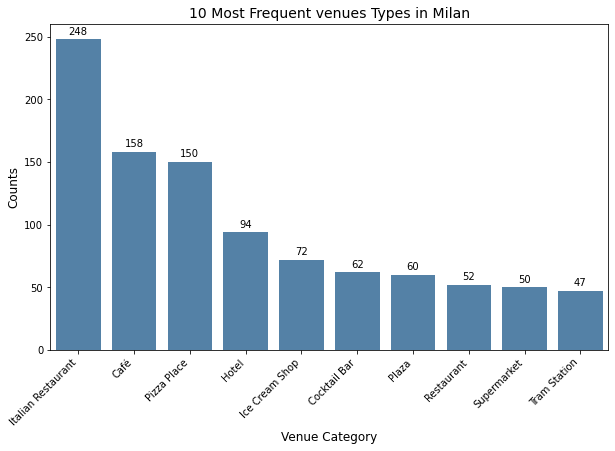

In [21]:
fig = plt.figure(figsize=(10,6))
fig = sns.barplot(x='venue_category',y='counts',data=dff_counts[0:10],color='steelblue')
plt.title('10 Most Frequent venues Types in Milan', fontsize=14)
plt.xlabel("Venue Category", fontsize=12)
plt.ylabel ("Counts", fontsize=12)
plt.xticks(rotation=45,  horizontalalignment='right')

for bar in fig.patches:
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    fig.annotate(format(bar.get_height(), '.0f'), 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', 
                 va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.savefig("10 Most Frequent venues Types in Milan.png")

plt.show()

In [22]:
milano_venues.groupby(['Neighborhood'])['Venue Category'].count().sort_values()

Neighborhood
MAGGIORE - MUSOCCO - CERTOSA                                     1
PARCO DEI NAVIGLI                                                1
QUINTOSOLE                                                       2
PARCO DELLE ABBAZIE                                              2
FIGINO                                                           3
PARCO BOSCO IN CITTA'                                            4
PARCO NORD                                                       4
QUARTO OGGIARO - VIALBA - MUSOCCO                                4
RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO                   4
CASCINA MERLATA                                                  4
MUGGIANO                                                         4
BARONA                                                           4
CANTALUPA                                                        5
BRUZZANO                                                         5
CHIARAVALLE                                      

Let's look at what kind of retaurants are present in Milan,

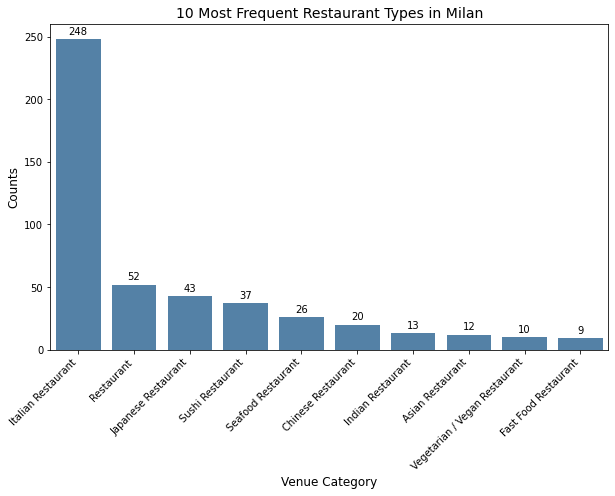

In [64]:
fig = plt.figure(figsize=(10,6))
fig = sns.barplot(x='venue_category',y='counts',data=df_counts[0:10],color='steelblue')
plt.title('10 Most Frequent Restaurant Types in Milan', fontsize=14)
plt.xlabel("Venue Category", fontsize=12)
plt.ylabel ("Counts", fontsize=12)
plt.xticks(rotation=45,  horizontalalignment='right')

for bar in fig.patches:
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    fig.annotate(format(bar.get_height(), '.0f'), 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', 
                 va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.savefig("10 Most Frequent Restaurant Types in Milan.png")

plt.show()

It seems after **italian restaurant the most prelevant are japanese, seafood and chinese** even tho compared to italian restaurant they only amount to a small percentage. 

Let's look at the neighborhood with most restaurants.

In [72]:
milano_venues_restr.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count()).sort_values()

Neighborhood
MUGGIANO                                                        1
MONCUCCO - SAN CRISTOFORO                                       1
NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI     1
COMASINA                                                        1
PARCO DELLE ABBAZIE                                             1
CIMIANO - ROTTOLE - Q.RE FELTRE                                 1
PARCO FORLANINI - CAVRIANO                                      1
PARCO NORD                                                      1
LORENTEGGIO                                                     1
QUINTOSOLE                                                      1
BRUZZANO                                                        1
STEPHENSON                                                      1
TALIEDO - MORSENCHIO - Q.RE FORLANINI                           1
AFFORI                                                          1
RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO                 

**Berna** has 39 restaurant followed by **Porta Garibaldi - Porta Nuova** with 29, and **Porta Ticinese - Conca del Naviglio** with 28. **Stazione Centrale - Ponte Seveso** the main station has 25 restaurants.

Let's perform clustering on the data by using k-means clustering

In [82]:
# one hot encoding
milano_res_onehot = pd.get_dummies(milano_venues_restr[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
milano_res_onehot['Neighborhood'] = milano_venues_restr['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [milano_res_onehot.columns[-1]] + list(milano_res_onehot.columns[:-1])
milano_res_onehot = milano_res_onehot[fixed_columns]

milano_res_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Campanian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Himalayan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Lebanese Restaurant,Lombard Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant,Roman Restaurant,Russian Restaurant,Sardinian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Sicilian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PORTELLO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,PORTELLO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,PORTELLO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,PORTELLO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# check dataframe shape
print(f'new dataframe has {milano_res_onehot.shape[0]} rows, {milano_res_onehot.shape[1]} columns')

new dataframe has 565 rows, 50 columns


In [45]:
milano_res_grouped = milano_res_onehot.groupby('Neighborhood').mean().reset_index()
milano_res_grouped

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Campanian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Himalayan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Lebanese Restaurant,Lombard Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant,Roman Restaurant,Russian Restaurant,Sardinian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Sicilian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,ADRIANO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,AFFORI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,BANDE NERE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,BICOCCA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.272727,0.090909,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.0000,0.000000,0.181818,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,BOVISA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000
6,BOVISASCA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [46]:
# check dataframe shape
print(f'grouped dataframe has {milano_res_grouped.shape[0]} rows, {milano_res_grouped.shape[1]} columns')

grouped dataframe has 75 rows, 50 columns


In [47]:
num_top_venues = 5

for ward in milano_res_grouped['Neighborhood']:
    print("----"+ward+"----")
    temp = milano_res_grouped[milano_res_grouped['Neighborhood'] == ward].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ADRIANO----
                 venue  freq
0   Italian Restaurant   1.0
1   African Restaurant   0.0
2   Seafood Restaurant   0.0
3  Moroccan Restaurant   0.0
4   Persian Restaurant   0.0


----AFFORI----
                 venue  freq
0   Italian Restaurant   1.0
1   African Restaurant   0.0
2   Seafood Restaurant   0.0
3  Moroccan Restaurant   0.0
4   Persian Restaurant   0.0


----BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA----
                 venue  freq
0   Italian Restaurant   1.0
1   African Restaurant   0.0
2   Seafood Restaurant   0.0
3  Moroccan Restaurant   0.0
4   Persian Restaurant   0.0


----BANDE NERE----
                    venue  freq
0              Restaurant  0.50
1    Fast Food Restaurant  0.25
2     Japanese Restaurant  0.25
3  Shabu-Shabu Restaurant  0.00
4      Persian Restaurant  0.00


----BICOCCA----
                venue  freq
0  Italian Restaurant  0.27
1    Sushi Restaurant  0.18
2   German Restaurant  0.09
3  Seafood Restaurant  0.09
4    Kebab Restaurant  

In [48]:
# Function to sort values in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = milano_res_grouped['Neighborhood']

for ind in np.arange(milano_res_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(milano_res_grouped.iloc[ind, :], num_top_venues)


In [50]:
# drop first column
milano_res_grouped_clustering = milano_res_grouped.drop('Neighborhood', axis=1)

In [51]:
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=42).fit(milano_res_grouped_clustering)
    cluster_labels = kmeans.labels_
        
    silhouette_avg = silhouette_score(milano_res_grouped_clustering, cluster_labels)
    print(f"For n_clusters: {k}, average silhouette score: {silhouette_avg:.3f}")  

For n_clusters: 2, average silhouette score: 0.274
For n_clusters: 3, average silhouette score: 0.277
For n_clusters: 4, average silhouette score: 0.339
For n_clusters: 5, average silhouette score: 0.345
For n_clusters: 6, average silhouette score: 0.331
For n_clusters: 7, average silhouette score: 0.339
For n_clusters: 8, average silhouette score: 0.356
For n_clusters: 9, average silhouette score: 0.349
For n_clusters: 10, average silhouette score: 0.372


In [52]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=42).fit(milano_res_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 0, 0, 2, 0, 1, 0], dtype=int32)

In [58]:
#This role is for when you need to use the cluster for data, but color=rainbow[cluster-1] can't take float, then you have to convert the Cluster Labels into int.
milano_res_merged= milano_res_merged.fillna(0)
milano_res_merged[['Cluster Labels']] = milano_res_merged[['Cluster Labels']].astype("int")

Visualazing the cluster.

In [88]:
# create map
map_clusters = folium.Map(location=[milano_lat, milano_lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(milano_res_merged['Latitude'],
                                  milano_res_merged['Longitude'],
                                  milano_res_merged['Neighborhood'], 
                                  milano_res_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon],
                        radius=5,
                        popup=label,
                        color=rainbow[cluster-1],
                        fill=True,
                        fill_color=rainbow[cluster-1],
                        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [60]:
milano_res_merged.loc[milano_res_merged['Cluster Labels'] == 0, 
                 milano_res_merged.columns[[0] + list(range(4, milano_res_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,TRENNO,0,0,0,0,0,0,0,0,0,0
2,PORTELLO,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Turkish Restaurant,Restaurant,Indian Restaurant,Sardinian Restaurant,Peruvian Restaurant,Puglia Restaurant
5,FIGINO,0,0,0,0,0,0,0,0,0,0
6,LORETO - CASORETTO - NOLO,Italian Restaurant,Japanese Restaurant,Asian Restaurant,Chinese Restaurant,Restaurant,African Restaurant,Shabu-Shabu Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant
7,QUARTO OGGIARO - VIALBA - MUSOCCO,0,0,0,0,0,0,0,0,0,0
8,ISOLA,Italian Restaurant,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Seafood Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Brazilian Restaurant,Lombard Restaurant,Kebab Restaurant
11,QUINTO ROMANO,0,0,0,0,0,0,0,0,0,0
13,GUASTALLA,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Spanish Restaurant,Modern European Restaurant,Sardinian Restaurant,African Restaurant,Russian Restaurant,Persian Restaurant
14,SAN SIRO,Chinese Restaurant,Mediterranean Restaurant,Sushi Restaurant,Italian Restaurant,Indian Restaurant,African Restaurant,Seafood Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant
15,COMASINA,Fast Food Restaurant,Shabu-Shabu Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant,Roman Restaurant,Russian Restaurant


In [61]:
milano_res_merged.loc[milano_res_merged['Cluster Labels'] == 1, 
                 milano_res_merged.columns[[0] + list(range(4, milano_res_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,Italian Restaurant,African Restaurant,Seafood Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant,Roman Restaurant
4,PARCO NORD,Italian Restaurant,African Restaurant,Seafood Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant,Roman Restaurant
9,QUARTO CAGNINO,Italian Restaurant,Campanian Restaurant,African Restaurant,Shabu-Shabu Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant,Roman Restaurant
12,DUOMO,Italian Restaurant,American Restaurant,Korean Restaurant,Restaurant,Sushi Restaurant,Japanese Restaurant,African Restaurant,Sardinian Restaurant,Peruvian Restaurant,Puglia Restaurant
17,GRECO - SEGNANO,Italian Restaurant,Chinese Restaurant,African Restaurant,Shabu-Shabu Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant,Roman Restaurant
18,DE ANGELI - MONTE ROSA,Italian Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,African Restaurant,Seafood Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant
20,BRUZZANO,Italian Restaurant,African Restaurant,Seafood Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant,Roman Restaurant
21,QT 8,Italian Restaurant,Restaurant,African Restaurant,Seafood Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant
24,QUINTOSOLE,Italian Restaurant,African Restaurant,Seafood Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant,Roman Restaurant
27,VILLAPIZZONE - CAGNOLA - BOLDINASCO,Italian Restaurant,Moroccan Restaurant,Japanese Restaurant,Himalayan Restaurant,Modern European Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Restaurant


In [62]:
milano_res_merged.loc[milano_res_merged['Cluster Labels'] == 2, 
                 milano_res_merged.columns[[0] + list(range(4, milano_res_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,BOVISASCA,Restaurant,Italian Restaurant,African Restaurant,Seafood Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant
10,STADIO - IPPODROMI,Restaurant,Seafood Restaurant,African Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant
22,STEPHENSON,Restaurant,African Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant,Russian Restaurant
23,CANTALUPA,Mediterranean Restaurant,Restaurant,African Restaurant,Seafood Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant
42,MUGGIANO,Restaurant,African Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant,Russian Restaurant
48,MONLUE' - PONTE LAMBRO,Moroccan Restaurant,Restaurant,African Restaurant,Middle Eastern Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant,Russian Restaurant
54,CHIARAVALLE,Restaurant,Italian Restaurant,African Restaurant,Seafood Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant
55,PARCO DELLE ABBAZIE,Restaurant,African Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant,Russian Restaurant
57,BANDE NERE,Restaurant,Fast Food Restaurant,Japanese Restaurant,Shabu-Shabu Restaurant,Persian Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant,Roman Restaurant,Russian Restaurant
60,PORTA VIGENTINA - PORTA LODOVICA,Restaurant,Mexican Restaurant,Argentinian Restaurant,Asian Restaurant,Japanese Restaurant,Italian Restaurant,Shabu-Shabu Restaurant,Peruvian Restaurant,Puglia Restaurant,Ramen Restaurant


## Results and Discussion <a name="results"></a>

Our analysis shows that although there is a great number of restaurants in Milan, cluster 1 and 2 have the highest concentration of restaurants, which is not surprising since that is the center of Milan and nearby wih Most of the restaurants offer Italian cuisine. Cluster 2 most common restaurant is Italian followed by predominantly African restaurants. Cluster 1 has the most variaety.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify what kind of restaurants are present in Milan. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to further understand the data.

This was just a general analysis that can be taken to gain further insight by performing a deeper analysis on the data to recommend a restaurant, to find a place for stakeholders to build one etc.